In [1]:
import haccytrees.mergertrees
import h5py
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
from itertools import groupby
from matplotlib.ticker import ScalarFormatter
%load_ext line_profiler
%reload_ext autoreload
%autoreload 1
%aimport help_func_haccytrees

pyfftw not available, using numpy fft


In [2]:
use_full = False
use_SV = True
if use_SV:
    which_sim = "LJSV"
    forest, progenitor_array = haccytrees.mergertrees.read_forest('/data/a/cpac/mbuehlmann/LJSV/forest/m000p.forest.hdf5',
                                                                  'LastJourneySV', nchunks=1, chunknum=0, mass_threshold = 2.7*10**11, include_fields = ["tree_node_mass", "snapnum", "fof_halo_tag", "sod_halo_cdelta", "fof_halo_center_x", "fof_halo_center_y", "fof_halo_center_z", "xoff_fof"])
# Leads to 23 rugs?
elif not use_full:
    which_sim = "Last Journey"
    forest, progenitor_array = haccytrees.mergertrees.read_forest(
        "/data/a/cpac/mbuehlmann/LastJourney/forest/m000p.forest.000.hdf5", 'LastJourney', 
        nchunks=10, 
        chunknum=0, 
        mass_threshold=1e11
    )
# Leads to 15 rugs
else:
# Full Last Journey
    which_sim = "Last Journey"
    forest, progenitor_array = haccytrees.mergertrees.read_forest('/data/a/cpac/mbuehlmann/LastJourney/forest/m000p.forest.000.hdf5',
                                                                  'LastJourney', nchunks=1, chunknum=0, mass_threshold = 2.7*10**11, include_fields = ["tree_node_mass", "snapnum", "fof_halo_tag", "sod_halo_cdelta", "xoff_fof"])

### Establish Globals

In [3]:
snap = 100
#mlims = [1e13, 1e14]
#my_range_str = ["{:.2e}".format(my_range[0]), "{:.2e}".format(my_range[1])]
rangel_bins = [1*10**11, 1.5*10**11, 2.3*10**11, 3.5*10**11, 5.3*10**11, 8.1*10**11, 1.2*10**12, 1.9*10**12, 2.8*10**12, 4.3*10**12, 6.6*10**12, 1*10**13]
rangel_bins2 = np.concatenate(([rangel_bins[0] - 0.25*10**11], [(rangel_bins[i] + rangel_bins[i+1]) / 2 for i in np.arange(len(rangel_bins) -1)], [rangel_bins[-1] + 3.4*10**13]), axis = 0)
# Convert snapshots to redshifts -- opposite order (chronological)
redshifts = np.flip(np.array([10.044, 9.8065, 9.5789, 9.3608, 9.1515, 8.7573, 8.5714, 8.3925, 8.0541, 7.8938, 7.7391, 7.4454, 7.3058, 7.04, 6.9134, 6.6718, 6.5564, 6.3358, 6.1277, 6.028, 5.8367, 5.6556, 5.4839, 5.3208, 5.2422, 5.0909, 4.9467, 4.7429, 4.6145, 4.4918, 4.3743, 4.2618, 4.1015, 4.00, 3.8551, 3.763, 3.6313, 3.5475, 3.4273, 3.3133, 3.205, 3.102, 3.0361, 2.9412, 2.8506, 2.7361, 2.6545, 2.5765, 2.4775, 2.4068, 2.3168, 2.2524, 2.1703, 2.0923, 2.018, 1.9472, 1.8797, 1.7994, 1.7384, 1.68, 1.6104, 1.5443, 1.4938, 1.4334, 1.3759, 1.321, 1.2584, 1.2088, 1.152, 1.1069, 1.0552, 1.006, 0.9591, 0.9143, 0.8646, 0.824, 0.7788, 0.7358, 0.6948, 0.6557, 0.6184, 0.5777, 0.5391, 0.5022, 0.4714, 0.4337, 0.4017, 0.3636, 0.3347, 0.3035, 0.2705, 0.2423, 0.2123, 0.1837, 0.1538, 0.1279, 0.1008, 0.0749, 0.0502, 0.0245, 0.00]))

## Fossil Group Stats

#### Find Fossil Groups

In [4]:
%%time
mlims = [1e13, 1e14]
xaxis = 'snap_nums'
absolute_threshold = True
threshold = 5e11
z_thresh = 1
violent_thresh = 20
norm_tf = False
# Go find yourself some fossil groups!
target_idx = help_func_haccytrees.bin_halos(forest, mlims)
binned_mainbranch_index, binned_mainbranch_masses = help_func_haccytrees.get_binned_branches(target_idx, forest, normalized = norm_tf)
binned_mainbranch_mergers = help_func_haccytrees.get_binned_mainbranch_mergers(forest, progenitor_array, binned_mainbranch_index, absolute_threshold)
binned_major_mergers = help_func_haccytrees.get_binned_major_mergers(binned_mainbranch_mergers, threshold)
binned_lmm_redshift, binned_lmm_index = help_func_haccytrees.get_binned_lmms(binned_major_mergers, threshold)
binned_fgs, binned_rugs, binned_mrich = help_func_haccytrees.find_binned_specials(forest, binned_mainbranch_index, binned_major_mergers, binned_lmm_redshift, target_idx, z_thresh, violent_thresh)
print(len(target_idx[0]))
print(len(binned_fgs[0]))
print(len(binned_rugs[0]))
print(len(binned_mrich[0]))

finding merger rich halos, not restricting mass
6197
382
23
1
CPU times: user 904 ms, sys: 520 ms, total: 1.42 s
Wall time: 786 ms


NameError: name 'binned_violent' is not defined

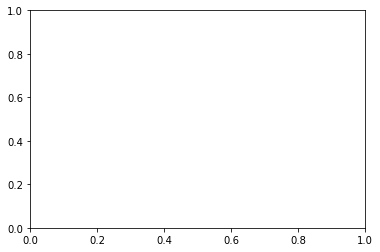

In [5]:
# How many major mergers for various specials?
fig, ax = plt.subplots()
labels = ["all halos", "fossil groups","violent groups"]
for i, halo_ids in enumerate([target_idx[0], binned_fgs[0], binned_violent[0]]):
    mainbranch_index, mainbranch_masses = help_func_haccytrees.get_branches(halo_ids, forest, normalized = norm_tf)
    mainbranch_mergers = help_func_haccytrees.get_mainbranch_mergers(forest, progenitor_array, mainbranch_index, absolute_threshold)
    major_mergers = help_func_haccytrees.get_major_mergers(mainbranch_mergers, threshold)
    mergers_count = help_func_haccytrees.count_major_mergers(major_mergers)
    print(np.min(mergers_count))
    hist = np.histogram(mergers_count, 10)
    norm_factor = len(mergers_count)
    bin_centers = (hist[1][:-1] + hist[1][1:])/2
    ax.plot(bin_centers, hist[0]/norm_factor, label = labels[i])
    ax.set_xlabel("# of major mergers")
    ax.set_ylabel("fraction")
ax.legend()

In [ ]:
all_mergers_count = help_func_haccytrees.count_major_mergers(binned_major_mergers[0])
print(len(mergers_count))
print(len(np.nonzero(mergers_count)[0]))
print(len(mergers_count) - len(np.nonzero(mergers_count)[0]))

CPU times: user 464 ms, sys: 0 ns, total: 464 ms
Wall time: 426 ms


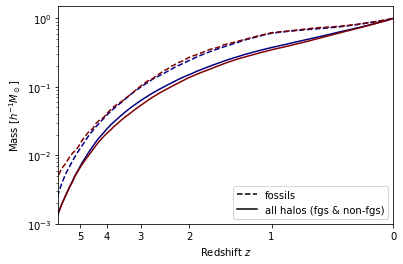

In [5]:
%%time
fg_idx = binned_fgs
nonfg_idx = target_idx
nsamples = 5
xend = 6
norm_tf = True
ylims = [1e-3, 1.5]
fig, ax = help_func_haccytrees.plot_compare_avgs_V2(forest, fg_idx, nonfg_idx, mbins, xend = xend, ylims = ylims, normalized = norm_tf)
fig.savefig("fg_compare_norm2.png")

In [101]:
a = np.array([[1,2,5],[2,4,0],[7,2,9],[3,4,2]])
print(a)
print(a[0:3, 0:1])
a[[0,2,1], [2,0,1]] # Interesting! It picks the rows and columns you want (zips together)

[[1 2 5]
 [2 4 0]
 [7 2 9]
 [3 4 2]]
[[1]
 [2]
 [7]]


array([5, 7, 4])

In [32]:
fig.savefig("fg_compare_bins7.png")

In [ ]:
# Now, analyze these new fg candidates!
xaxis = 'snap_nums'
fg_target_idx = binned_fgs[1] # Test one bin at a time
fg_binned_mainbranch_index, fg_binned_mainbranch_masses = help_func_haccytrees.get_branches(fg_target_idx, forest)
fig, ax = help_func_haccytrees.plot_evol(fg_binned_mainbranch_masses, x_axis = xaxis)
fig.savefig("fgs_evol.png")

In [ ]:
# another plot
fig1, ax1 = help_func_haccytrees.plot_evol(binned_mainbranch_masses[2], x_axis = xaxis) 

## Match Masses

0
1144
6197


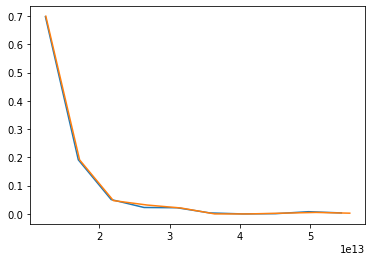

In [8]:
matched_all_halos = help_func_haccytrees.match_masses(forest, fgs, target_idx)
fig, ax = plt.subplots()
for halo_idx in [matched_all_halos, fgs]:
    hist = np.histogram(forest['tree_node_mass'][halo_idx])
    norm_factor = len(halo_idx)
    bin_centers = (hist[1][:-1] + hist[1][1:])/2
    ax.plot(bin_centers, hist[0]/norm_factor)
print(len(matched_all_halos))
print(len(target_idx))

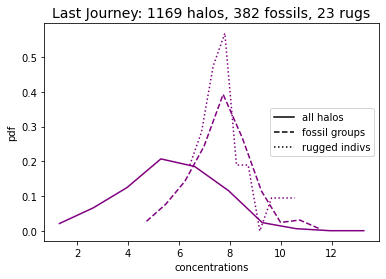

In [74]:
# Compare FGs to non-FGs
# ADD MORE BINS (once you have enough data)
fig = None
ax = None
handles = []
linestyles = iter(['-', '--', ':'])
labels = iter(["all halos", "fossil groups", "rugged indivs"])
cols = iter(["purple", "purple", "purple"])
all_halos = matched_all_halos
for this_category in [all_halos, fgs, rugs]:
    current_linestyle = next(linestyles)
    current_label = next(labels)
    cdeltas, fig, ax = help_func_haccytrees.plot_cdeltas(forest, this_category, fig, ax, linestyle = current_linestyle, colors = cols)
    ax.legend()
    fake_line, = ax.plot([],[], linestyle = current_linestyle, color = 'black', label = current_label)
    handles.append(fake_line)
    
ax.legend(handles = handles, loc = "center right")
ax.set_xlabel("concentrations")
ax.set_ylabel("pdf") # "fraction" was meaningless because my normalization was wrong
ax.set_title("Last Journey: " + str(len(all_halos)) + " halos, " + str(len(fgs)) + " fossils, " + str(len(rugs)) + " rugs", fontsize = 14)

fig.savefig("cdeltas_non_fgs_rugs_matched.png")

### Concentration

In [ ]:
# Compare FGs to non-FGs
fig = None
ax = None
handles = []
linestyles = iter(['-', '--', ':'])
cat_names = iter(["all halos", "fossil groups", "rugged indivs"])
cols = iter(["purple", "purple", "purple"])
for this_category in [target_idx, binned_fgs, binned_rugs]:
    current_linestyle = next(linestyles)
    current_label = next(cat_names)
    cdeltas, fig, ax = help_func_haccytrees.plot_cdeltas(forest, this_category, fig, ax, linestyle = current_linestyle, colors = cols)
    ax.legend()
    fake_line, = ax.plot([],[], linestyle = current_linestyle, color = 'black', label = current_label)
    handles.append(fake_line)
    
ax.legend(handles = handles, loc = "center right")
ax.set_xlabel("concentrations")
ax.set_ylabel("fraction")
ax.set_title("Last Journey: " + str(len(target_idx[0])) + " halos, " + str(len(binned_fgs[0])) + " fossils, " + str(len(binned_failed[0])) + " rugs", fontsize = 14)

fig.savefig("cdeltas_non_fgs_rugs.png")

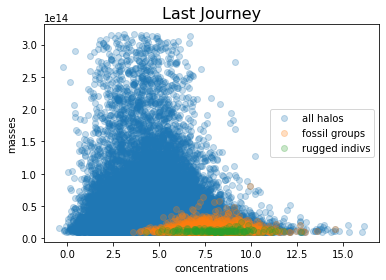

In [26]:
# What about when we account for mass?
fig = None
ax = None
handles = []
labels = iter(["all halos", "fossil groups", "rugged indivs"])
cols = iter(["purple", "purple", "purple"])
fig, ax = plt.subplots()
for i, halo_idx in enumerate([target_idx[0], binned_fgs[0], binned_rugs[0]]):
    current_label = next(labels)
    cdeltas = forest['sod_halo_cdelta'][halo_idx]
    masses = forest['tree_node_mass'][halo_idx]
    ax.scatter(cdeltas, masses, label = current_label, alpha = 0.25)
    
ax.legend(loc = "center right")
ax.set_xlabel("concentrations")
ax.set_ylabel("masses")
ax.set_title(which_sim, fontsize = 16)

fig.savefig("cdeltas_vs_masses.png")

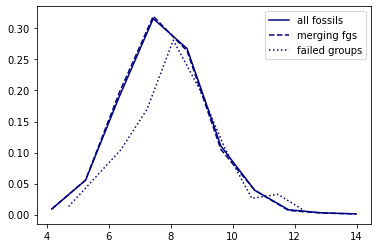

In [24]:
# Failed vs. merging 
all_fossils = np.concatenate((binned_fgs[0], binned_failed[0]))
fig = None
ax = None
linestyles = iter(['-', '--', ':'])
labels = iter(["all fossils", "merging fgs", "failed groups"])
handles = []
for halo_idx in [all_fossils, binned_fgs[0], binned_failed[0]]:
    cdeltas, fig, ax = help_func_haccytrees.plot_cdeltas(forest, [halo_idx], fig, ax, linestyle = next(linestyles), labels = labels, color = 'purple')
    
#fig.savefig("cdelta_fgs_merging_vs_failed.png")

In [12]:
np.isin(binned_failed[0], binned_fgs[0])

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

## Relaxation

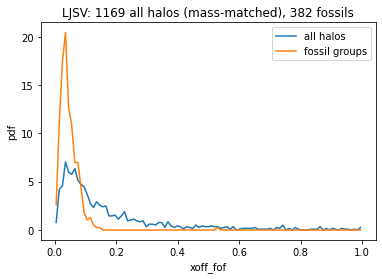

In [70]:
match_masses = True
if match_masses:
    all_halos = matched_all_halos
    suffix = " (mass-matched), "
    suffix2 = ""
else:
    all_halos = target_idx[0]
    suffix = ","
    suffix2 = "_unmatched"
    
nbins = np.linspace(0, 1, 100)
fig, ax = plt.subplots()
halos = [all_halos, fgs] # target_idx[0]
labels = iter(["all halos", "fossil groups"])
for halo_idx in halos:
    current_label = next(labels)
    xoff = forest['xoff_fof'][halo_idx]
    hist = np.histogram(xoff, bins = nbins, density = True)
    #norm_factor = np.sum(hist[0]) * dx # where dx is width of one bin
    bin_centers = (hist[1][:-1] + hist[1][1:])/2
    ax.plot(bin_centers, hist[0], label = current_label)
ax.set_xlabel("xoff_fof")
ax.set_ylabel("pdf")
ax.set_title(which_sim + ": " + str(len(halos[0])) + " all halos" + suffix + str(len(halos[1])) + " fossils")
ax.legend()
fig.savefig("xoff_fof" + suffix2 + ".png")

### Split by

In [34]:
column = 'sod_halo_cdelta'
thresh = 7.435
binned_high, binned_low = help_func_haccytrees.binned_split_by(forest, binned_fgs, column, thresh)

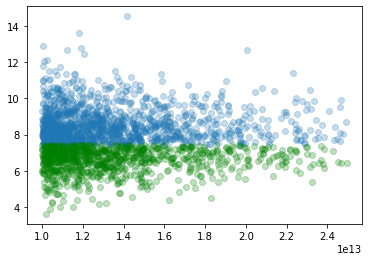

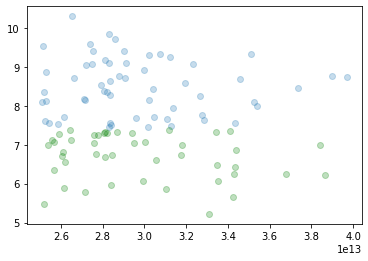

In [25]:
for i in [0,1]:
    fig, ax = plt.subplots()
    masses_high = forest['tree_node_mass'][binned_high[i]]
    cdeltas_high = forest['sod_halo_cdelta'][binned_high[i]]
    ax.scatter(masses_high, cdeltas_high, alpha = 0.25)
    masses_low = forest['tree_node_mass'][binned_low[i]]
    cdeltas_low = forest['sod_halo_cdelta'][binned_low[i]]
    ax.scatter(masses_low, cdeltas_low, color = 'green', alpha = 0.25)
    #fig.savefig('cdeltas_masses.png')

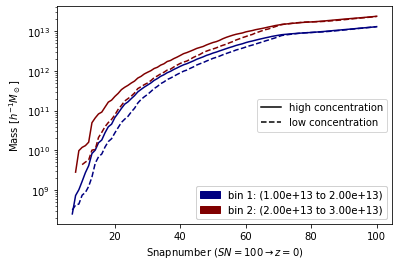

In [40]:
fig = None
ax = None
linestyles = iter(['-', '--'])
labels = iter(['high concentration', 'low concentration'])
handles = []
for this_idx in [binned_high, binned_low]:
    current_linestyle = next(linestyles)
    current_label = next(labels)
    mainbranch_binned_index, mainbranch_binned_masses = help_func_haccytrees.get_binned_branches(this_idx, forest, snap = 100)
    mainbranch_avg_masses = help_func_haccytrees.avg_mass_bins(mainbranch_binned_masses)
    xaxis = 'snap_nums'
    fig, ax = help_func_haccytrees.plot_evol(mainbranch_avg_masses, bins = mbins, avg = True, x_axis = xaxis, fig = fig, ax = ax, linestyle = current_linestyle) #, cust_color = 'blue')
    fake_line, = ax.plot([],[], linestyle = current_linestyle, label=current_label, color = 'black')
    handles.append(fake_line)
ax.legend(handles = handles, loc = "center right")
fig.savefig("cdeltas_mass_evol.png")

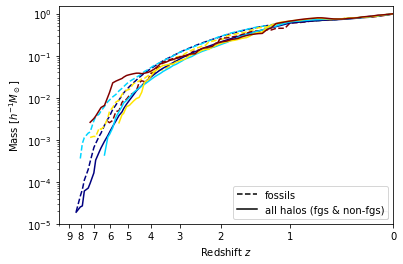

In [27]:
nsamples = 5
xend = 10
norm_tf = True
ylims = [1e-5, 1.5]
fig, ax = help_func_haccytrees.plot_compare_avgs_V2(forest, binned_high, binned_low, mbins, xend = xend, ylims = ylims, normalized = norm_tf)

### Abundances

In [19]:
n_vals = 30
start = 10**10.8
test_thresholds = [start * 10**(0.1*i) for i in range(1, n_vals + 1)]
thresholds_are_absolute = True
mbins = [1e13, 5e13, 1e14]
target_idx = help_func_haccytrees.bin_halos(forest, mbins) # Check your mbins
#bin_halo_idx = help_func.bin_halos(forest_table, snap, mbins) 

# Make a custom legend
z_thresholds = [5, 7, 9]
linestyles = iter(['-', '--', ':', '-.'])
legs = []
labels = []
for this_z in z_thresholds:
    this_linestyle = next(linestyles)
    legs.append(Line2D([0,1],[0,1], linestyle = this_linestyle, color="black"))
    labels.append("z threshold = " + str(this_z))
custom_legend = [legs, labels]

In [22]:
# Do some plotting
nbins = 2
norm_tf = True
plot_tots_tf = False
ax = None # For the first time plotting
fig = None
linestyles = iter(['-', '--', ':', '-.'])
my_marker = '.'
vert = 5*10**11 #None
#horz = None
special_bin_labels = [r"bin 1: [$10^{13}$, $10^{13.5}$] $h^{-1}M_\odot$", r"bin 2: [$10^{13.5}$, $10^{15}$] $h^{-1}M_\odot$"]
for this_z in z_thresholds:
    print("z: ", this_z)
    binned_timesteps, binned_masses, binned_main_prog_list, binned_maj_mergers, binned_mm_times, binned_LMMs, binned_LMM_times, binned_fossil_groups = help_func_haccytrees.track_evol_binned(bin_halo_idx, my_bins, redshifts, progenitor_idx, forest_masses, forest_snap_nums, test_thresholds, thresholds_are_absolute, x_axis = xaxis, z_threshold = this_z)
    horz = len(binned_masses[0])
    tot_num_candidates, binned_num_candidates = help_func_haccytrees.calc_candidates_vs_threshold(binned_fossil_groups, test_thresholds, nbins = nbins, normalized = norm_tf)
    fig, ax = help_func_haccytrees.plot_candidates_vs(test_thresholds, tot_num_candidates, binned_num_candidates, bins = my_bins, bin_labels = special_bin_labels, normalized = norm_tf, plot_tots = plot_tots_tf, fig = fig, ax = ax, vert_line = vert, hor_line = horz, cust_legend = custom_legend, linestyle = next(linestyles), linewidth = 2)
ax.set_xlim(10**11, 2*10**13)

z:  5


AttributeError: module 'help_func_haccytrees' has no attribute 'track_evol_binned'

## L-Galaxies

In [96]:
# Get ids of FG candidates
fg_tree_node_idx = forest['tree_node_index'][np.concatenate(binned_fgs)]
#np.savetxt("fg_tree_node_indexes.out", tree_node_idx)
print(fg_tree_node_idx.shape)

(372,)


In [97]:
# This file has definitely been run through L-Galaxies
cores = h5py.File('/home/kovacs/cosmology/LastJourney/CoreTrees/fof_group_SV_lgal_FOF_20files/0.coretrees.hdf5.vector', 'r')
tested_idx = cores['trees']['ParentHaloTag'][:]
print(tested_idx.shape)
print(type(tested_idx[0]))
tested_idx

(12669813,)
<class 'numpy.int64'>


array([2247296759518735665, 2193253563990289535, 2139210368461843589, ...,
       1643814387976248793, 1598778391702543961, 1562749594683579917])

In [98]:
mask = np.isin(fg_tree_node_idx, tested_idx)
matches = fg_tree_node_idx[mask]
print(matches)
matches.shape

[2247296738043895935 2247296738043897096 2247296738043897392
 2247296738043900414 2247296742338855259 2247296742338856457
 2247296742338863153 2247296742338867408 2247296742338867956
 2247296746633833366 2247296746633833828 2247296746633836563
 2247296746633838500 2247296750928790695 2247296750928794113
 2247296750928790549 2247296750928796632 2247296750928805188
 2247296750928809084 2247296750928810342 2247296755223763150
 2247296755223763908 2247296755223757618 2247296755223768780
 2247296759518724838 2247296759518726472 2247296759518727913]


(27,)

In [135]:
# Now find some random non-FGs
full_tree_node_idx = forest['tree_node_index'][np.concatenate(target_idx)]
non_FGs_mask = ~np.isin(full_tree_node_idx, fg_tree_node_idx)
non_fg_tree_node_idx = full_tree_node_idx[non_FGs_mask]
# pick some random ones
n = 20
high = len(non_fg_tree_node_idx)
rand = np.random.randint(high, size=(n))
non_fg_sample = non_fg_tree_node_idx[rand]
non_fg_sample

array([2247296643554612116, 2247296360086773440, 2247296407331407251,
       2247296750928809431, 2247296742338856318, 2247296656439523709,
       2247296587720046260, 2247296248417624241, 2247296579130111177,
       2247296536180431408, 2247296544770362034, 2247296291367300069,
       2247296450281084365, 2247296321432060988, 2247296725158993731,
       2247296342906899788, 2247296707979124645, 2247296566245205003,
       2247296265597485338, 2247296269892453123])

In [138]:
#preserved_non_fg_sample = [2247296411626387539, 2247296673619394957, 2247296695094218298, 2247296669324413016, 2247296746633836855, 2247296609194878969, 2247296609194880626, 2247296544770366577, 2247296480345857623, 2247296634964674807, 2247296304252192920, 2247296295662265965, 2247296226942780294, 2247296458871013495, 2247296261302522366, 2247296634964681444, 2247296321432072007, 2247296686504288381, 2247296566245200591, 2247296278482397747]

In [139]:
# Lol oops, that doesn't work
np.isin(preserved_non_fg_sample, tested_idx)

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

In [152]:
%%time
# Let's do this differently
# Find all the non-fgs
full_tree_node_idx = forest['tree_node_index'][np.concatenate(target_idx)]
non_FGs_mask = ~np.isin(full_tree_node_idx, fg_tree_node_idx) # could I just do it all here?
non_fg_tree_node_idx = full_tree_node_idx[non_FGs_mask]
# Find which ones are in Eve's file
in_file_mask = np.isin(non_fg_tree_node_idx, tested_idx)
non_fg_matches = non_fg_tree_node_idx[in_file_mask]
# Choose a few random samples
n = 20
high = len(non_fg_matches)
rand = np.random.randint(high, size=(n))
non_fg_sample = non_fg_matches[rand]
np.isin(non_fg_sample, tested_idx)

CPU times: user 1.05 s, sys: 80.8 ms, total: 1.13 s
Wall time: 1.13 s


In [148]:
print(non_fg_sample)

[2247296759518724248 2247296738043900332 2247296755223768998
 2247296746633837336 2247296742338857092 2247296746633830831
 2247296750928802713 2247296742338867162 2247296750928804357
 2247296759518734018 2247296746633825284 2247296759518730587
 2247296746633825276 2247296759518727978 2247296750928808403
 2247296738043897176 2247296742338860208 2247296759518730648
 2247296750928802672 2247296746633835653]


In [157]:
preserved_non_fg_sample = [2247296750928802672, 2247296750928808422, 2247296750928804360, 2247296750928795730, 2247296750928803874, 2247296759518732816, 2247296755223763914, 2247296742338856892, 2247296746633823547, 2247296755223757231, 2247296750928803026, 2247296746633835653, 2247296746633835532, 2247296746633823547, 2247296750928804138, 2247296742338860208, 2247296750928803752, 2247296742338866735, 2247296755223759482, 2247296746633837336]
np.isin(preserved_non_fg_sample, tested_idx)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [155]:
%%time
# Even faster?
# Find all the non-fgs
full_tree_node_idx = forest['tree_node_index'][np.concatenate(target_idx)]
non_fg_tree_node_idx = np.setdiff1d(full_tree_node_idx, fg_tree_node_idx, assume_unique=True) # Return the unique values in ar1 that are not in ar2.
# Find which ones are in Eve's file
non_fg_matches = np.intersect1d(non_fg_tree_node_idx, tested_idx, assume_unique=True) # Return the sorted, unique values that are in both of the input arrays
# Choose a few random samples
n = 20
high = len(non_fg_matches)
rand = np.random.randint(high, size=(n))
non_fg_sample = non_fg_matches[rand]
#np.isin(non_fg_sample, tested_idx)

CPU times: user 1.07 s, sys: 11.1 ms, total: 1.08 s
Wall time: 1.08 s


### Calculate z80s

mainbranch_index shape:  (2324, 101)
mainbranch_index shape:  (43710, 101)
mainbranch_index shape:  (41386, 101)
Abundance of fossils :  2324
Fraction > z=0.4:  976  /  2324 = 0.4199655765920826
Abundance of non-fossils :  41386
Fraction > z=0.4:  8914  /  41386 = 0.21538684579326342
Abundance of all halos :  43710
Fraction > z=0.4:  9890  /  43710 = 0.22626401281171357


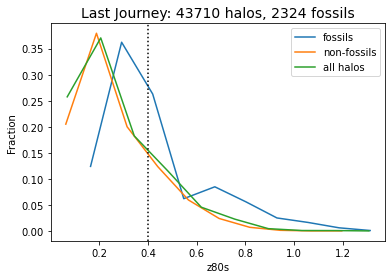

In [26]:
# FG z80s
fgs_idx = binned_fgs[0]
fg_mainbranch_index, fg_mainbranch_masses = help_func_haccytrees.get_branches(fgs_idx, forest)
fg_z80s = help_func_haccytrees.get_z80s(forest, redshifts, fgs_idx, fg_mainbranch_masses)
# All z80s
all_halos_idx = target_idx[0]
all_mainbranch_index, all_mainbranch_masses = help_func_haccytrees.get_branches(all_halos_idx, forest)
all_z80s = help_func_haccytrees.get_z80s(forest, redshifts, all_halos_idx, all_mainbranch_masses)
# Non-FG z80s
mask = ~np.isin(all_halos_idx, fgs_idx)
non_fgs_idx = all_halos_idx[mask]
non_fg_mainbranch_index, non_fg_mainbranch_masses = help_func_haccytrees.get_branches(non_fgs_idx, forest)
non_fg_z80s = help_func_haccytrees.get_z80s(forest, redshifts, non_fgs_idx, non_fg_mainbranch_masses)

# Plot histograms
fig, ax = plt.subplots()
labels = iter(["fossils", "non-fossils", "all halos"])
for z80s in [fg_z80s, non_fg_z80s, all_z80s]:
    current_label = next(labels)
    hist = np.histogram(z80s)
    norm_factor = len(z80s)
    print("Abundance of", current_label, ": ", norm_factor)
    print("Fraction > z=0.4: ", len(z80s[z80s >= 0.4]), " / ", norm_factor, "=", len(z80s[z80s >= 0.4])/norm_factor)
    bin_centers = (hist[1][:-1] + hist[1][1:]) / 2
    ax.plot(bin_centers, hist[0]/norm_factor, label = current_label)
    ax.legend()
ax.set_ylabel("Fraction")
ax.set_xlabel("z80s")
ax.axvline(0.4, color = 'black', linestyle = ':')
ax.set_title("Last Journey: " + str(len(all_halos_idx)) + " halos, " + str(len(fgs_idx)) + " fossils", fontsize = 14)
fig.savefig("z80s_hist.png")

# Calculate abundances
#print(len(fg_z80s[fg_z80s >= 0.4]))

In [18]:
# Calculate fraction of z80s before/after z = 0.4
cutoff = 0.4
fg_z04_frac = len(fg_z80s[fg_z80s > cutoff])/len(fg_z80s)
print(fg_z04_frac)
non_fg_z04_frac = len(non_fg_z80s[non_fg_z80s > cutoff])/len(non_fg_z80s)
print(non_fg_z04_frac)
all_z80_frac = len(all_z80s[all_z80s > cutoff])/len(all_z80s)
print(all_z80_frac)

0.418796015591165
0.23906893794969558
0.25098331945680574


### Calculate z50s

Abundance of fossils :  382
Fraction > z=1:  350  /  382 = 0.9162303664921466
Abundance of non-fossils :  5815
Fraction > z=1:  818  /  5815 = 0.14067067927773
Abundance of all halos :  6197
Fraction > z=1:  1168  /  6197 = 0.18847829594965307


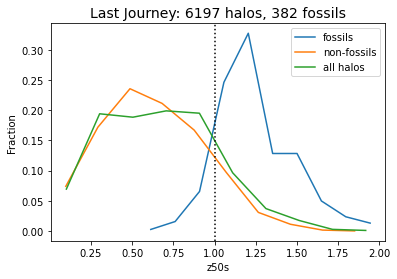

In [6]:
# What would it take for this to be a function?
frac = 0.5
# FG z50s
fgs_idx = binned_fgs[0]
fg_mainbranch_index, fg_mainbranch_masses = help_func_haccytrees.get_branches(fgs_idx, forest)
fg_z50s = help_func_haccytrees.get_zfracs(forest, redshifts, fgs_idx, fg_mainbranch_masses, frac)
# All z50s
all_halos_idx = target_idx[0]
all_mainbranch_index, all_mainbranch_masses = help_func_haccytrees.get_branches(all_halos_idx, forest)
all_z50s = help_func_haccytrees.get_zfracs(forest, redshifts, all_halos_idx, all_mainbranch_masses, frac)
# Non-FG z50s
mask = ~np.isin(all_halos_idx, fgs_idx)
non_fgs_idx = all_halos_idx[mask]
non_fg_mainbranch_index, non_fg_mainbranch_masses = help_func_haccytrees.get_branches(non_fgs_idx, forest)
non_fg_z50s = help_func_haccytrees.get_zfracs(forest, redshifts, non_fgs_idx, non_fg_mainbranch_masses, frac)

# Plot histograms
fig, ax = plt.subplots()
labels = iter(["fossils", "non-fossils", "all halos"])
for z50s in [fg_z50s, non_fg_z50s, all_z50s]:
    current_label = next(labels)
    hist = np.histogram(z50s)
    norm_factor = len(z50s)
    print("Abundance of", current_label, ": ", norm_factor)
    print("Fraction > z=1: ", len(z50s[z50s >= 1]), " / ", norm_factor, "=", len(z50s[z50s >= 1])/norm_factor)
    bin_centers = (hist[1][:-1] + hist[1][1:]) / 2
    ax.plot(bin_centers, hist[0]/norm_factor, label = current_label) 
    #ax.plot(bin_centers, hist[0], label = current_label) # Notice the weird dip in orange below green?
    ax.legend()
ax.set_ylabel("Fraction")
ax.set_xlabel("z50s")
ax.set_title("Last Journey: " + str(len(all_halos_idx)) + " halos, " + str(len(fgs_idx)) + " fossils", fontsize = 14)
ax.axvline(1.0, color = 'black', linestyle = ':')
fig.savefig("z50s_hist.png")

In [16]:
# Calculate fraction of z80s before/after z = 0.4
cutoff = 1.0
fg_z50_frac = len(fg_z50s[fg_z50s > cutoff])/len(fg_z50s)
print(fg_z50_frac)
non_fg_z50_frac = len(non_fg_z50s[non_fg_z50s > cutoff])/len(non_fg_z50s)
print(non_fg_z50_frac)
all_z50_frac = len(all_z50s[all_z50s > cutoff])/len(all_z50s)
print(all_z50_frac)

0.9367691641403205
0.1697620072566263
0.22060807901007723
